In [2]:
import numpy as np

In [3]:
import torch

In [4]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

In [5]:
import data_loaders

In [6]:
from data_loaders import Plain_Dataset, eval_data_dataloader

In [7]:
from SQ_EX_Att import SECNN

In [8]:
def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        count = 0
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data)
            #print(outputs[0])
            #print(outputs[0])
            loss = criterion(outputs,labels)
            #print(labels[0])
             
            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)

        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))

    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")



In [9]:
epochs = 2000
lr = 0.001
batchsize = 64

In [10]:
input_shape = (3, 48, 48)
net = SECNN(input_shape,num_classes=8)

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
net.load_state_dict(torch.load("SQEX_weights"))


<All keys matched successfully>

In [12]:
transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [13]:
traincsv_file = "data2" + "/"+"train.csv"
validationcsv_file = "data2" + "/"+"val.csv"

In [14]:
train_img_dir = "data2"+"/"+"train/"

In [15]:
validation_img_dir = "data2"+"/"+"val/"

In [16]:
train_dataset= Plain_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)


In [17]:
validation_dataset= Plain_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)


In [18]:
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [19]:
criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= 0.0001, weight_decay = 0.00005)


In [28]:
Train(3000, train_loader, val_loader, criterion, optmizer, device)

===================================Start Training===================================
Epoch: 1 	Training Loss: 0.01177005 	Validation Loss 0.01626554 	Training Acuuarcy 72.747% 	Validation Acuuarcy 63.384%
Epoch: 2 	Training Loss: 0.01174711 	Validation Loss 0.01633241 	Training Acuuarcy 72.534% 	Validation Acuuarcy 62.680%
Epoch: 3 	Training Loss: 0.01175047 	Validation Loss 0.01632357 	Training Acuuarcy 72.555% 	Validation Acuuarcy 63.208%
Epoch: 4 	Training Loss: 0.01174395 	Validation Loss 0.01620121 	Training Acuuarcy 72.571% 	Validation Acuuarcy 63.138%
Epoch: 5 	Training Loss: 0.01167904 	Validation Loss 0.01660760 	Training Acuuarcy 72.929% 	Validation Acuuarcy 62.575%
Epoch: 6 	Training Loss: 0.01166613 	Validation Loss 0.01620212 	Training Acuuarcy 72.787% 	Validation Acuuarcy 63.384%
Epoch: 7 	Training Loss: 0.01165743 	Validation Loss 0.01636351 	Training Acuuarcy 72.942% 	Validation Acuuarcy 62.540%
Epoch: 8 	Training Loss: 0.01165487 	Validation Loss 0.01633935 	Training A

Epoch: 69 	Training Loss: 0.01128102 	Validation Loss 0.01624470 	Training Acuuarcy 73.458% 	Validation Acuuarcy 62.856%
Epoch: 70 	Training Loss: 0.01131394 	Validation Loss 0.01658005 	Training Acuuarcy 73.734% 	Validation Acuuarcy 62.364%
Epoch: 71 	Training Loss: 0.01135246 	Validation Loss 0.01596606 	Training Acuuarcy 73.259% 	Validation Acuuarcy 63.841%
Epoch: 72 	Training Loss: 0.01127894 	Validation Loss 0.01631267 	Training Acuuarcy 73.235% 	Validation Acuuarcy 63.173%
Epoch: 73 	Training Loss: 0.01126416 	Validation Loss 0.01635501 	Training Acuuarcy 73.562% 	Validation Acuuarcy 62.575%
Epoch: 74 	Training Loss: 0.01124021 	Validation Loss 0.01626841 	Training Acuuarcy 73.407% 	Validation Acuuarcy 62.610%
Epoch: 75 	Training Loss: 0.01129546 	Validation Loss 0.01638181 	Training Acuuarcy 73.468% 	Validation Acuuarcy 62.434%
Epoch: 76 	Training Loss: 0.01126472 	Validation Loss 0.01638639 	Training Acuuarcy 73.559% 	Validation Acuuarcy 62.399%
Epoch: 77 	Training Loss: 0.0113

Epoch: 137 	Training Loss: 0.01114077 	Validation Loss 0.01626688 	Training Acuuarcy 73.666% 	Validation Acuuarcy 62.223%
Epoch: 138 	Training Loss: 0.01118216 	Validation Loss 0.01623595 	Training Acuuarcy 73.757% 	Validation Acuuarcy 62.856%
Epoch: 139 	Training Loss: 0.01122379 	Validation Loss 0.01608897 	Training Acuuarcy 73.437% 	Validation Acuuarcy 63.313%
Epoch: 140 	Training Loss: 0.01120213 	Validation Loss 0.01615766 	Training Acuuarcy 73.613% 	Validation Acuuarcy 62.891%
Epoch: 141 	Training Loss: 0.01120779 	Validation Loss 0.01639469 	Training Acuuarcy 73.589% 	Validation Acuuarcy 62.012%
Epoch: 142 	Training Loss: 0.01116046 	Validation Loss 0.01642947 	Training Acuuarcy 73.562% 	Validation Acuuarcy 62.610%
Epoch: 143 	Training Loss: 0.01114144 	Validation Loss 0.01631017 	Training Acuuarcy 73.505% 	Validation Acuuarcy 62.575%
Epoch: 144 	Training Loss: 0.01107469 	Validation Loss 0.01645094 	Training Acuuarcy 73.987% 	Validation Acuuarcy 62.610%
Epoch: 145 	Training Los

Epoch: 205 	Training Loss: 0.01114572 	Validation Loss 0.01643819 	Training Acuuarcy 73.872% 	Validation Acuuarcy 62.610%
Epoch: 206 	Training Loss: 0.01118088 	Validation Loss 0.01653246 	Training Acuuarcy 73.663% 	Validation Acuuarcy 62.504%
Epoch: 207 	Training Loss: 0.01111532 	Validation Loss 0.01682168 	Training Acuuarcy 73.859% 	Validation Acuuarcy 61.836%
Epoch: 208 	Training Loss: 0.01112496 	Validation Loss 0.01622995 	Training Acuuarcy 73.724% 	Validation Acuuarcy 62.997%
Epoch: 209 	Training Loss: 0.01104561 	Validation Loss 0.01648626 	Training Acuuarcy 74.003% 	Validation Acuuarcy 62.645%
Epoch: 210 	Training Loss: 0.01109343 	Validation Loss 0.01664487 	Training Acuuarcy 73.801% 	Validation Acuuarcy 62.399%
Epoch: 211 	Training Loss: 0.01115731 	Validation Loss 0.01678786 	Training Acuuarcy 73.572% 	Validation Acuuarcy 61.414%
Epoch: 212 	Training Loss: 0.01110126 	Validation Loss 0.01642577 	Training Acuuarcy 73.768% 	Validation Acuuarcy 62.504%
Epoch: 213 	Training Los

Epoch: 273 	Training Loss: 0.01107974 	Validation Loss 0.01634514 	Training Acuuarcy 73.946% 	Validation Acuuarcy 62.504%
Epoch: 274 	Training Loss: 0.01108486 	Validation Loss 0.01624478 	Training Acuuarcy 73.744% 	Validation Acuuarcy 63.102%
Epoch: 275 	Training Loss: 0.01106810 	Validation Loss 0.01607084 	Training Acuuarcy 73.906% 	Validation Acuuarcy 63.419%
Epoch: 276 	Training Loss: 0.01104957 	Validation Loss 0.01614381 	Training Acuuarcy 73.768% 	Validation Acuuarcy 62.926%
Epoch: 277 	Training Loss: 0.01100659 	Validation Loss 0.01640826 	Training Acuuarcy 73.869% 	Validation Acuuarcy 62.645%
Epoch: 278 	Training Loss: 0.01101699 	Validation Loss 0.01621847 	Training Acuuarcy 73.808% 	Validation Acuuarcy 63.454%
Epoch: 279 	Training Loss: 0.01104136 	Validation Loss 0.01681490 	Training Acuuarcy 73.872% 	Validation Acuuarcy 61.942%
Epoch: 280 	Training Loss: 0.01107073 	Validation Loss 0.01624110 	Training Acuuarcy 73.916% 	Validation Acuuarcy 62.997%
Epoch: 281 	Training Los

Epoch: 341 	Training Loss: 0.01102402 	Validation Loss 0.01632143 	Training Acuuarcy 73.886% 	Validation Acuuarcy 63.243%
Epoch: 342 	Training Loss: 0.01094183 	Validation Loss 0.01643519 	Training Acuuarcy 74.158% 	Validation Acuuarcy 62.434%
Epoch: 343 	Training Loss: 0.01102852 	Validation Loss 0.01632798 	Training Acuuarcy 73.875% 	Validation Acuuarcy 63.067%
Epoch: 344 	Training Loss: 0.01097259 	Validation Loss 0.01614133 	Training Acuuarcy 73.960% 	Validation Acuuarcy 63.524%
Epoch: 345 	Training Loss: 0.01099848 	Validation Loss 0.01668325 	Training Acuuarcy 73.862% 	Validation Acuuarcy 62.645%
Epoch: 346 	Training Loss: 0.01099541 	Validation Loss 0.01625185 	Training Acuuarcy 73.980% 	Validation Acuuarcy 62.997%
Epoch: 347 	Training Loss: 0.01095911 	Validation Loss 0.01652993 	Training Acuuarcy 73.872% 	Validation Acuuarcy 62.962%
Epoch: 348 	Training Loss: 0.01098013 	Validation Loss 0.01607074 	Training Acuuarcy 74.142% 	Validation Acuuarcy 63.630%
Epoch: 349 	Training Los

Epoch: 409 	Training Loss: 0.01102816 	Validation Loss 0.01616657 	Training Acuuarcy 73.690% 	Validation Acuuarcy 63.595%
Epoch: 410 	Training Loss: 0.01100507 	Validation Loss 0.01651352 	Training Acuuarcy 73.852% 	Validation Acuuarcy 62.856%
Epoch: 411 	Training Loss: 0.01101011 	Validation Loss 0.01640400 	Training Acuuarcy 73.987% 	Validation Acuuarcy 62.329%
Epoch: 412 	Training Loss: 0.01099458 	Validation Loss 0.01669279 	Training Acuuarcy 73.939% 	Validation Acuuarcy 62.364%
Epoch: 413 	Training Loss: 0.01095268 	Validation Loss 0.01609473 	Training Acuuarcy 73.943% 	Validation Acuuarcy 63.665%
Epoch: 414 	Training Loss: 0.01095228 	Validation Loss 0.01652780 	Training Acuuarcy 74.098% 	Validation Acuuarcy 62.223%
Epoch: 415 	Training Loss: 0.01096313 	Validation Loss 0.01620160 	Training Acuuarcy 74.064% 	Validation Acuuarcy 62.891%
Epoch: 416 	Training Loss: 0.01100613 	Validation Loss 0.01640569 	Training Acuuarcy 73.855% 	Validation Acuuarcy 62.223%
Epoch: 417 	Training Los

KeyboardInterrupt: 

In [1]:
torch.save(net.state_dict(), "SQEX_weights")


NameError: name 'torch' is not defined

In [21]:
test_dataset= Plain_Dataset(csv_file="data2/test.csv", img_dir = "data2/test/", datatype = 'test', transform = transformation)


In [22]:
test_loader=   DataLoader(test_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [23]:
test_result = []
test_loss = 0
test_correct = 0
for data,labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            test_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            t_loss = criterion(test_outputs, labels)
            test_loss += t_loss.item()
            _, test_preds = torch.max(test_outputs,1)
            test_result.append(torch.max(test_outputs,1))
            test_correct += torch.sum(test_preds == labels.data)

In [24]:
print("Final accuracy on the testing set = ", test_correct/7099)

Final accuracy on the testing set =  tensor(0.6157, device='cuda:0')


In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

In [26]:
classes = ('Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness',
        'Neutral', 'Sadness', 'Surprise')

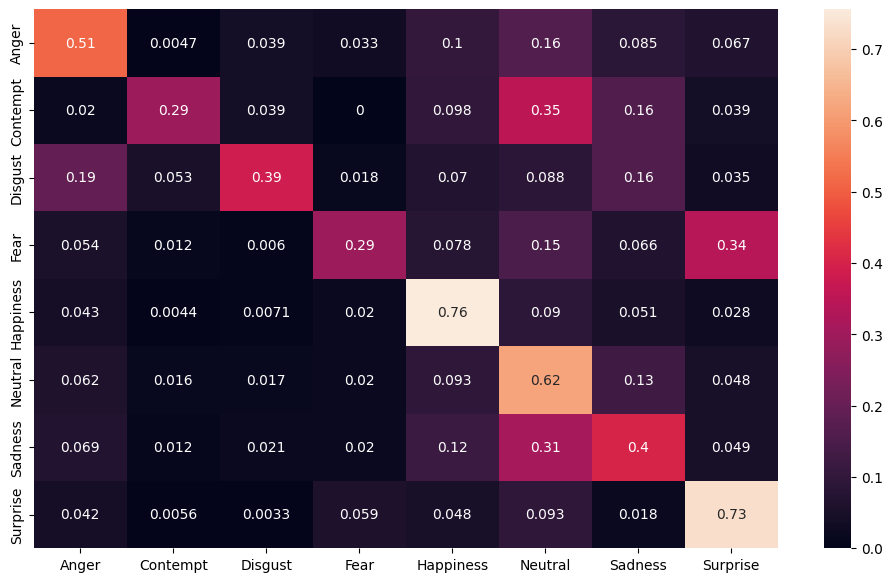

In [27]:
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')